## Baseline checks

Just checking everything works as it should

In [37]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

centralized_subfolder = '20_epochs'
centralized_training_loss = f"../results/periodic/centralized_training/{centralized_subfolder}/loss_per_epoch.csv"

fed_subfolder = "15_rounds"


### Check centralized training

Text(0.5, 1.0, 'Centralized Training MSE')

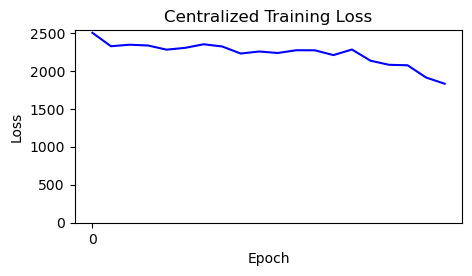

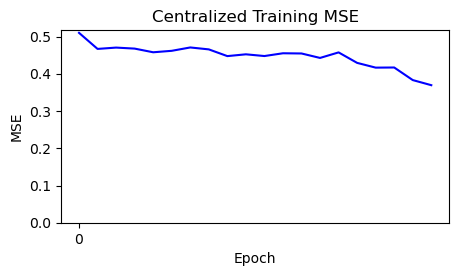

In [38]:
#read in the csv file
df_centralized_training_loss = pd.read_csv(centralized_training_loss)
#plot the training loss
plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['loss'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
# plot only every 50th epoch
max_epoch = df_centralized_training_loss['epoch'].max()
plt.xticks(np.arange(0, max_epoch, 25))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Centralized Training Loss')


plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['mse'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
plt.xticks(np.arange(0, max_epoch, 25))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Centralized Training MSE')


## Plot client side

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_3206/870365384.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


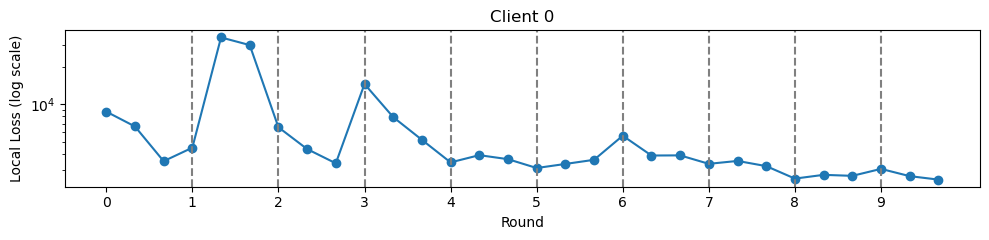

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_3206/870365384.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


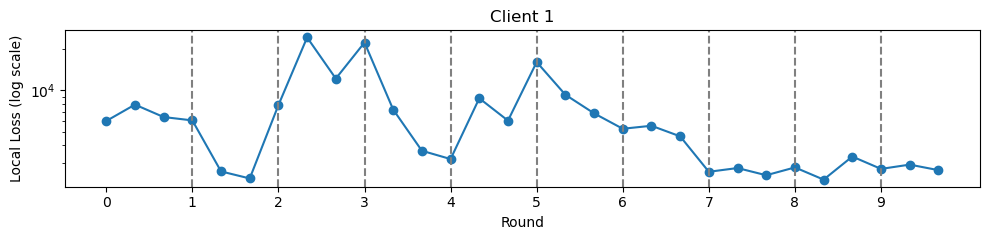

In [39]:
cn = 0

def plot_client_loss(cn):

    # Load JSON file
    with open(f"../results/periodic/federated_training/{fed_subfolder}/federated_outputs/results_{cn}.json", "r") as f:
        data = json.load(f)


    # Extract loss values, rounds, and epochs
    loss_values = []
    rounds = []
    epochs = []

    epoch_count = 0  # To keep track of epochs

    for entry in data["client_train"]:
        round_number = entry["round"]
        for loss in entry["loss"]:
            rounds.append(round_number)
            loss_values.append(loss)
            epochs.append(epoch_count)
            epoch_count += 1

    # make it smaller 
    plt.figure(figsize=(10, 2.5))
    # Plot loss values sequentially across rounds and epochs
    plt.plot(epochs, loss_values, marker='o', label="Loss across epochs")


    # Add vertical lines for each round number
    for round_number in set(rounds):
        round_epochs = [i for i, r in enumerate(rounds) if r == round_number]
        if round_epochs:
            # Place a vertical line at the first epoch of each round
            # if it is not the first round
            if round_number != 0:
                plt.axvline(x=round_epochs[0], color='grey', linestyle='--', label=f"Round {round_number}")

    # Customize x-axis ticks to represent rounds
    xticks = [i for i, round_number in enumerate(rounds) if i == 0 or rounds[i] != rounds[i-1]]
    plt.xticks(xticks, [rounds[i] for i in xticks])
    # log scale y 
    plt.yscale('log')

    plt.ylim(bottom=0)
    plt.xlabel("Round")
    plt.ylabel("Local Loss (log scale)")
    plt.title(f"Client {cn}")
    plt.tight_layout()
    plt.show()

plot_client_loss(0)
plot_client_loss(1)

([<matplotlib.axis.XTick at 0x30a719e80>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

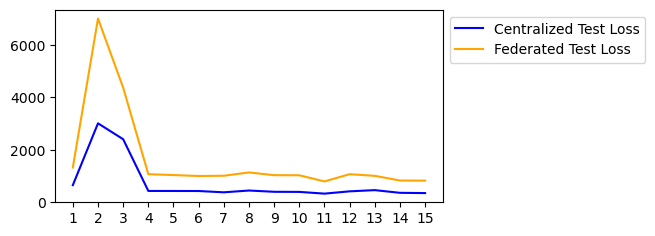

In [40]:
# Now load the federated learning loss
federated_training_loss = f"../results/periodic/federated_training/{fed_subfolder}/federated_outputs/results.json"
with open(federated_training_loss, 'r') as f:
    data = json.load(f)

# Plot centralized evaluate
df_centralized_evaluate = pd.DataFrame(data['centralized_evaluate'])
df_federated_evaluate = pd.DataFrame(data['federated_evaluate'])

# Join the two dataframes on the round
df_centralized_evaluate['round'] = df_centralized_evaluate['round'].astype(int)
df_federated_evaluate['round'] = df_federated_evaluate['round'].astype(int)

# join the two dataframes on the round
df = pd.merge(df_centralized_evaluate, df_federated_evaluate, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_loss'], label='Centralized Test Loss', color='blue')
plt.plot(df['round'], df['federated_evaluate_loss'], label='Federated Test Loss', color='orange')
# log scale

# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])

Text(0.5, 1.0, 'Test MSE')

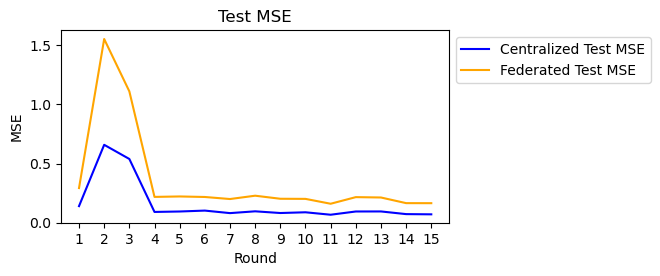

In [41]:
# same as above with mse
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_accuracy'], label='Centralized Test MSE', color='blue')
plt.plot(df['round'], df['federated_evaluate_accuracy'], label='Federated Test MSE', color='orange')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])
# add x and y labels
plt.xlabel('Round')
plt.ylabel('MSE')
plt.title('Test MSE')

## Use the produced model to plot the output

In [42]:
fed_subfolder_fedode = "15_rounds"
fed_subfolder_fedavg = "15_rounds_fedavg"

# Now load the federated learning loss
fedode = f"../results/periodic/federated_training/{fed_subfolder_fedode}/federated_outputs/results.json"
fedavg = f"../results/periodic/federated_training/{fed_subfolder_fedavg}/federated_outputs/results.json"

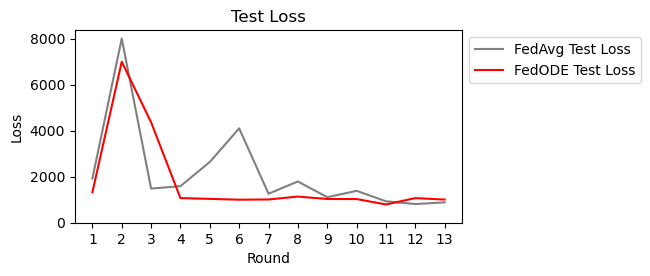

In [43]:
# plot loss of both fedode and fedavg
with open(fedavg, 'r') as f:
    data_fedavg = json.load(f)
with open(fedode, 'r') as f:
    data_fedode = json.load(f)

data_fedavg_df = pd.DataFrame(data_fedavg['federated_evaluate'])
data_fedode_df = pd.DataFrame(data_fedode['federated_evaluate'])
# join the two dataframes on the round
data_fedavg_df['round'] = data_fedavg_df['round'].astype(int)
data_fedode_df['round'] = data_fedode_df['round'].astype(int)
df_fedavg_fedode = pd.merge(data_fedavg_df, data_fedode_df, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_x'], label='FedAvg Test Loss', color='grey')  
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_y'], label='FedODE Test Loss', color='red')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_fedavg_fedode['round'])
# add x and y labels
plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.show()


In [45]:
data_fedavg_df

,round,federated_evaluate_loss,federated_evaluate_accuracy
0,1,1921.981934,0.404602
1,2,8014.409505,1.695538
2,3,1485.227376,0.310590
3,4,1590.754150,0.331096
4,5,2644.198893,0.583314
5,6,4104.613932,1.239651
6,7,1261.635091,0.254833
7,8,1794.628825,0.453842
8,9,1110.306519,0.246249
9,10,1387.232340,0.311738


In [46]:
data_fedode_df

,round,federated_evaluate_loss,federated_evaluate_accuracy
0,1,1326.406779,0.292715
1,2,7005.058268,1.551489
2,3,4369.271322,1.109384
3,4,1071.219523,0.218074
4,5,1037.406982,0.221817
5,6,1002.043091,0.217382
6,7,1011.545329,0.200062
7,8,1137.272257,0.228175
8,9,1032.795044,0.202329
9,10,1029.560140,0.201355
